<a href="https://colab.research.google.com/github/nithinbadicodes/AI-ML-Projects/blob/master/LoanRepaymentPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Repayment Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Checking for null values**

In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.purpose.value_counts()

,count
purpose,
debt_consolidation,3957
all_other,2331
credit_card,1262
home_improvement,629
small_business,619
major_purchase,437
educational,343


## Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['purpose'] = le.fit_transform(df['purpose'])
df.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
3430,1,2,0.1189,497.46,11.156251,19.61,717,3540.000000,21694,82.2,0,0,0,0
6576,1,0,0.1148,197.82,11.002100,9.12,712,4652.000000,8715,50.1,0,1,0,0
8187,0,1,0.1078,293.72,11.918391,11.57,687,3450.041667,31629,101.4,2,0,0,1
102,1,6,0.1501,73.68,11.472103,16.89,702,4080.000000,51,0.0,0,0,0,1
8558,0,2,0.1545,453.52,10.596635,14.52,657,3810.000000,8545,82.2,3,0,0,0


In [12]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [10]:
df['purpose'].value_counts()

,count
purpose,
2,3957
0,2331
1,1262
4,629
6,619
5,437
3,343


## Data Visualization

Text(0.5, 0, 'FICO')

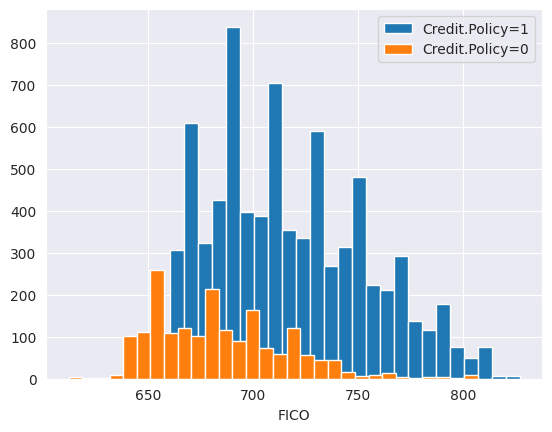

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy']==1], bins=30, label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy']==0], bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

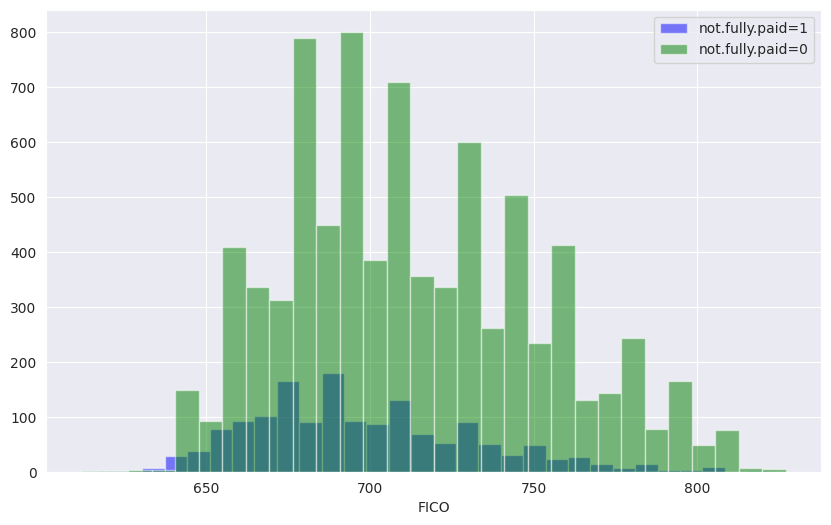

In [13]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

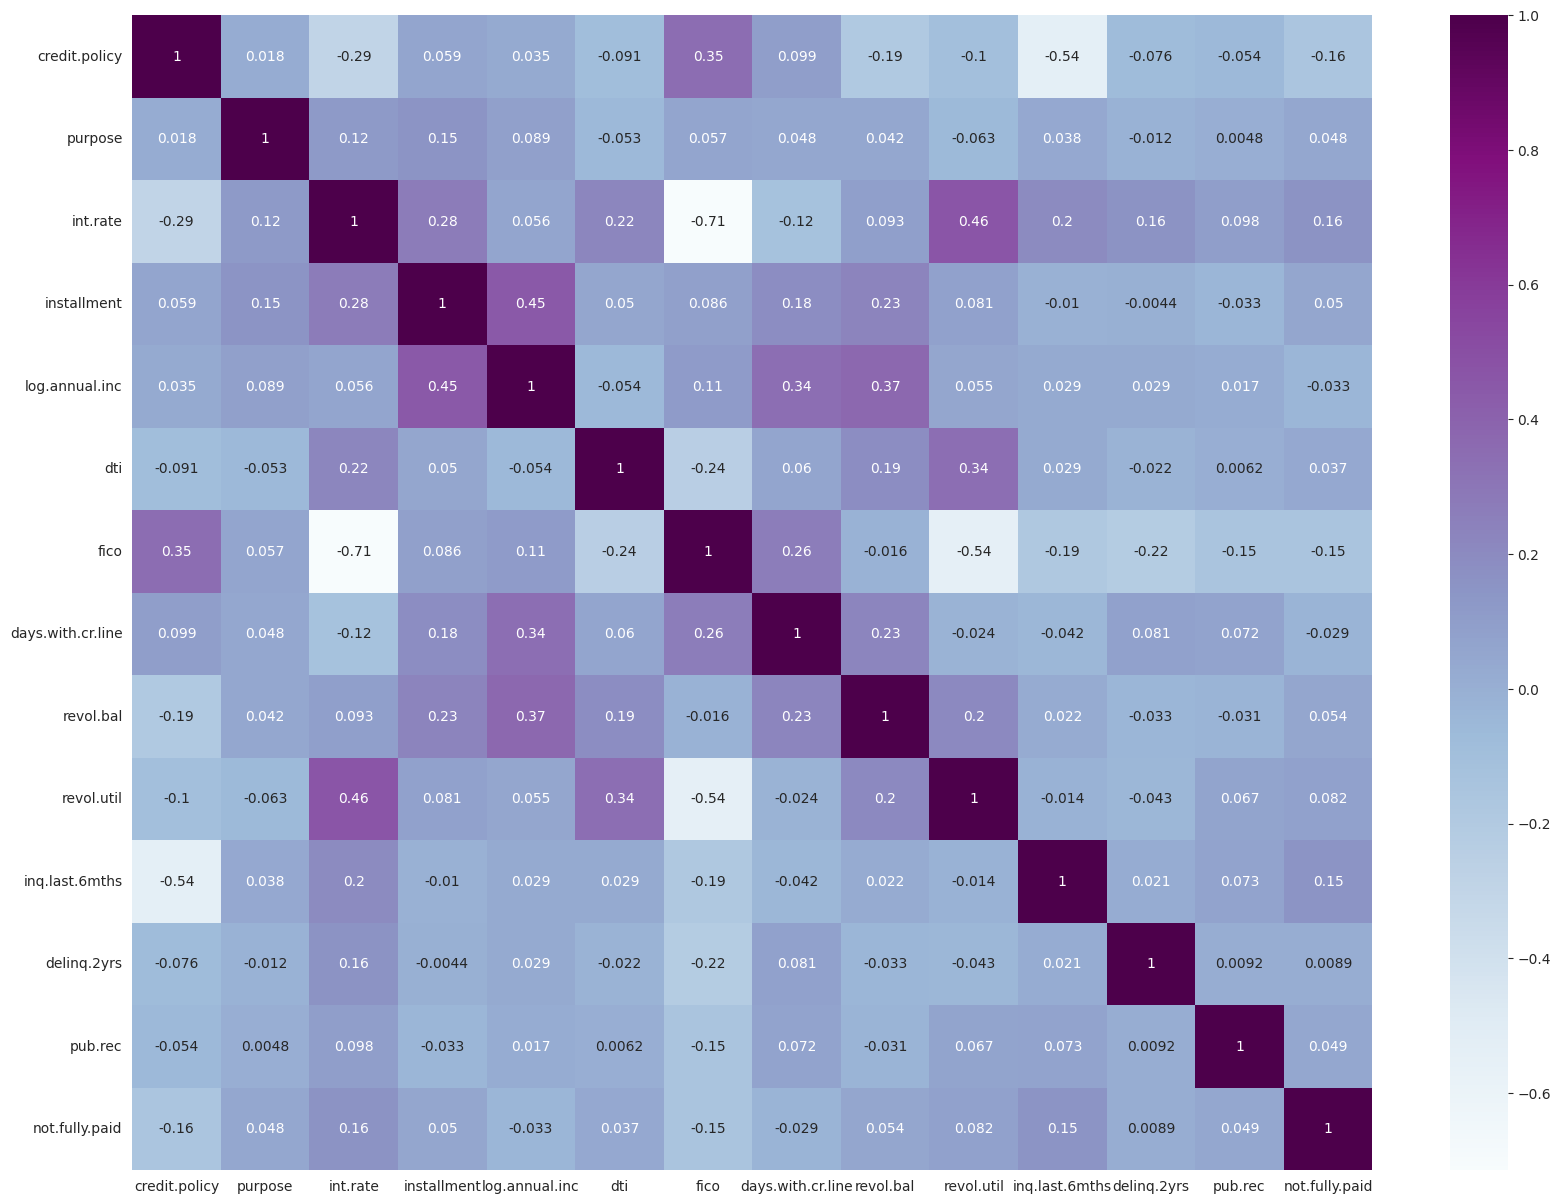

In [14]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), cmap='BuPu', annot=True)
plt.show()

**Let's explore the relationship between FICO and interest rate further**

<Figure size 1000x600 with 0 Axes>

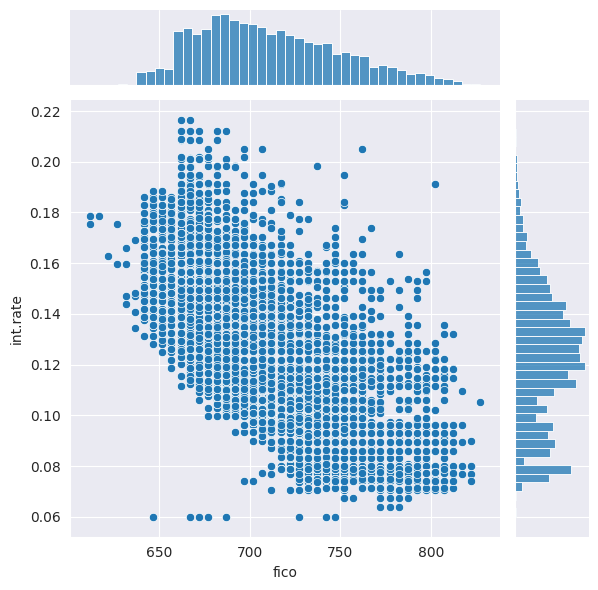

In [15]:
#checking the trend between FICO and the interest rate
plt.figure(figsize=(10,6))
sns.jointplot(x='fico', y='int.rate', data=df)

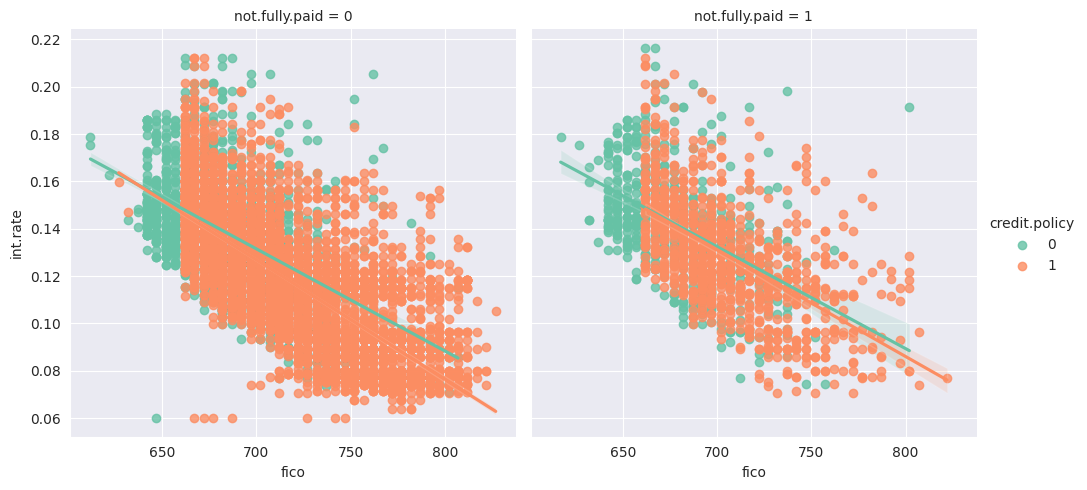

In [16]:
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')
